# Temporal-difference Learning

In [1]:
from gym_basic import envs
import gym
import numpy
from collections import defaultdict
from matplotlib import pyplot

## Windy Gridworld

In [2]:
env = gym.make('WindyGridWorld-v0')

In [3]:
observation = env.reset()
t = 0
while True:
    action = env.action_space.sample()  # take a random action
    observation, reward, done, info = env.step(action)
    if done:
        print('episode finished after {:>2} time steps'.format(t))
        break
    t += 1

episode finished after 12742 time steps


## Sarsa

In [4]:
def epsilon_greedy_policy(env, S, Q, epsilon):
    if numpy.random.rand() < epsilon:
        return env.action_space.sample()
    return numpy.argmax([Q[S, A] for A in range(env.action_space.n)])

In [5]:
def sarsa(env, n_episodes, gamma=1.0, alpha=0.5, epsilon=0.1):
    Q = defaultdict(float)
    stats = []
    t = 0
    for _ in range(n_episodes):
        S = env.reset()
        A = epsilon_greedy_policy(env, S, Q, epsilon)
        while True:
            S_prime, R, done, _ = env.step(A)
            A_prime = epsilon_greedy_policy(env, S_prime, Q, epsilon)
            Q[S, A] += alpha * (R + gamma * Q[S_prime, A_prime] - Q[S, A])
            S, A = S_prime, A_prime
            t += 1
            if done:
                break
        stats.append(t)
    return Q, stats

Q, stats = sarsa(env, 50000)

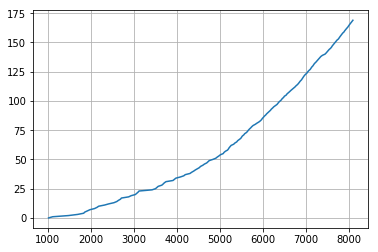

In [6]:
pyplot.plot(stats[:170], range(170))
pyplot.grid()

In [7]:
policy = numpy.zeros((env.height, env.width), numpy.int)
V = numpy.zeros((env.height, env.width), numpy.int)
for i in range(env.height):
    for j in range(env.width):
        S = i, j
        policy[S] = numpy.argmax([Q[S, A] for A in range(env.action_space.n)])
        V[S] = numpy.max([Q[S, A] for A in range(env.action_space.n)])

S = env.reset()
G = 0
for t in range(16):
    A = policy[S]
    S_, R, done, info = env.step(A)
    G += R
    print('state {}, action {}, reward {}, action-value {}'.format(S, A, R, Q[S, A]))
    S = S_
    if done:
        print('finished after {:>2} time steps with total reward {}'.format(t + 1, G))
        break

V

state (3, 0), action 1, reward -1, action-value -18.615445614160677
state (3, 1), action 1, reward -1, action-value -18.513248712078372
state (3, 2), action 2, reward -1, action-value -17.172846544187863
state (4, 2), action 1, reward -1, action-value -15.556759894029714
state (4, 3), action 1, reward -1, action-value -15.2494433470952
state (3, 4), action 1, reward -1, action-value -13.394331984562085
state (2, 5), action 1, reward -1, action-value -12.183691427800287
state (1, 6), action 1, reward -1, action-value -11.567998548439931
state (0, 7), action 1, reward -1, action-value -9.73047638473176
state (0, 8), action 1, reward -1, action-value -7.220785890211758
state (0, 9), action 2, reward -1, action-value -6.145693448800314
state (1, 9), action 2, reward -1, action-value -5.173364506037853
state (2, 9), action 2, reward -1, action-value -4.159818331317963
state (3, 9), action 2, reward -1, action-value -3.0788106600527367
state (4, 9), action 3, reward -1, action-value -2.01571

array([[-19, -17, -15, -14, -13, -12, -11,  -9,  -7,  -6],
       [-18, -17, -16, -14, -15, -11, -11,  -9, -10,  -5],
       [-19, -18, -17, -16, -12, -12, -11, -11,  -8,  -4],
       [-18, -18, -17, -14, -13, -14, -11,   0,  -8,  -3],
       [-20, -16, -15, -15, -15, -13,   0,  -1,  -1,  -2],
       [-19, -18, -16, -15, -14,   0,   0,  -3,  -7,  -7],
       [-19, -18, -16, -15,   0,   0,   0,   0,  -2,  -5]])